In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Task 1
Загрузка данных и ознакомление с ними

Цель: Загрузить данные и получить общее представление о структуре датасета.:

Импортировать необходимые библиотеки (например, `pandas`, `numpy`).
Загрузить датасет из файла.

Вывести первые несколько строк датасета.
Посмотреть общую информацию о датасете (типы данных, количество пропущенных значений, описание колонок).


In [7]:
# Читаем файл
data=pd.read_csv('ecommerce_dataset.csv')

In [9]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [13]:
# Колонки
data.columns

Index(['date', 'customer_id', 'order_id', 'product', 'quantity', 'price'], dtype='object')

In [15]:
# Описание
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


# Task 2


Предобработка данных
Цель: Подготовить данные для анализа.

Привести названия колонок к единому стилю (например, все строчные буквы).
Обработать пропущенные значения (удалить или заполнить).

Привести столбцы к нужным типам данных (например, преобразовать столбец с датами к типу `datetime`).
Проверить и удалить дублирующиеся строки.


In [11]:
# Проверяем пустых строк
data[data.isnull().any(axis=1)]

,date,customer_id,order_id,product,quantity,price


In [13]:
# Проверим на наличие дубликатов
data[data.duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price


Датаға келтіру

In [5]:
data['date']=pd.to_datetime(data['date'].astype(str), format='%Y%m%d%H')
data['only_date']=data['date'].dt.date
data['time']=data['date'].dt.time
data['year']=data['date'].dt.year

In [7]:
# Функция для очичтки колонки product
def only_name(product):
    parts_of_product=product.split(',')
    clear_name=parts_of_product[0].strip()
    return clear_name

In [9]:
# Создаем колонку только для имен продуктов и применяем функцию
data['only_product_name']=data['product'].apply(only_name)

In [11]:
# Удаляем ненужную колонку
data=data.drop('product',axis=1)

# Task 3

Исследовательский анализ данных (`EDA`)
Цель: Изучить основные характеристики данных и выявить закономерности.

Построить `распределение заказов` по датам.

Построить `гистограммы` по количеству товаров и ценам.

Выявить самых `популярных клиентов` (по количеству заказов).

Определить `самые продаваемые` товары.

Проанализировать `среднюю стоимость` заказа.


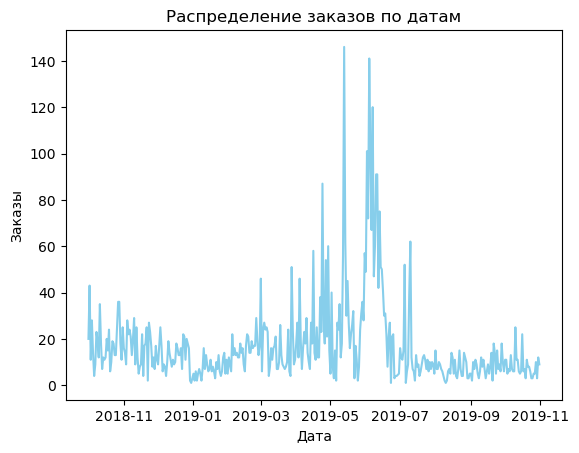

In [17]:
# Распределение заказов по датам.
Series=data.groupby('only_date')['order_id'].count()
x=Series.index
y=Series.values
plt.plot(x,y, color='skyblue')
plt.title('Распределение заказов по датам')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.show()

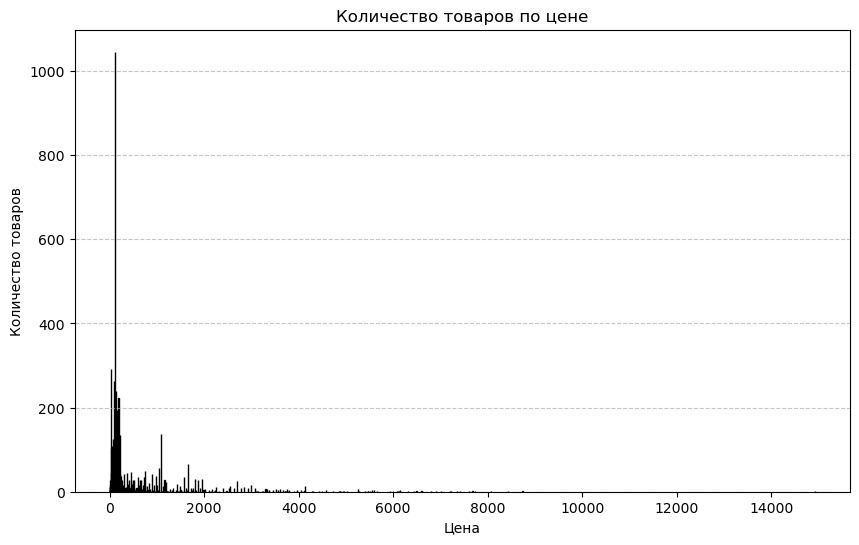

In [250]:
price_counts = data.groupby('price')['quantity'].count()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(price_counts.index, price_counts.values, color='skyblue', edgecolor='black')
plt.title('Количество товаров по цене')
plt.xlabel('Цена')
plt.ylabel('Количество товаров')  # Устанавливаем метки по оси X для каждой уникальной цены
plt.grid(axis='y', linestyle='--', alpha=0.7)

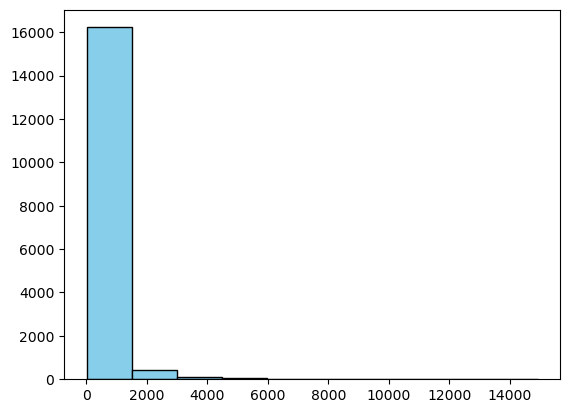

In [21]:
plt.hist(data['price'], bins=10, weights=data['quantity'], color='skyblue', edgecolor='black')
plt.show()

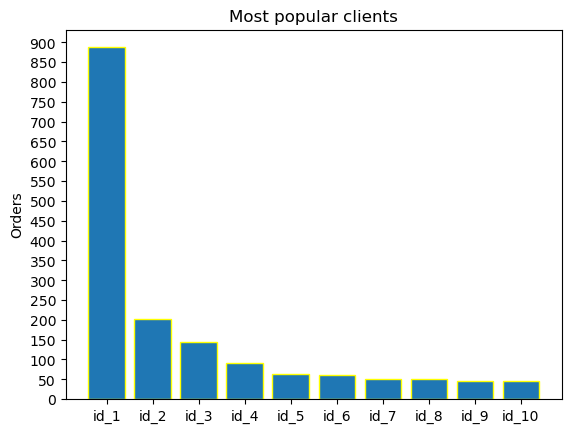

In [10]:
# У кого больше заказов
most_x=data.groupby('customer_id')['order_id'].count()
most_x=most_x.sort_values(ascending=False)
# For creating names
names=[f'id_{i}' for i in range(1,11)]
most_x=most_x.head(10)
# Столбчатая диаграмма
plt.bar(names, most_x.values,edgecolor='yellow')
plt.title('Most popular clients')
plt.ylabel('Orders')
plt.yticks(range(0,950,50))
plt.show()

In [31]:
# Аттары ұзын болған соң, басын бөлетін функция
def first_word(pro):
    pro=pro.split()
    pro=pro[0]
    return pro

In [33]:
# Функцияны колонкаға қолданамыз
x=x.reset_index()
names=x['only_product_name'].apply(first_word)

In [35]:
# Там есть дубликат, заменяем на новое
names[4]='Муляж_2'

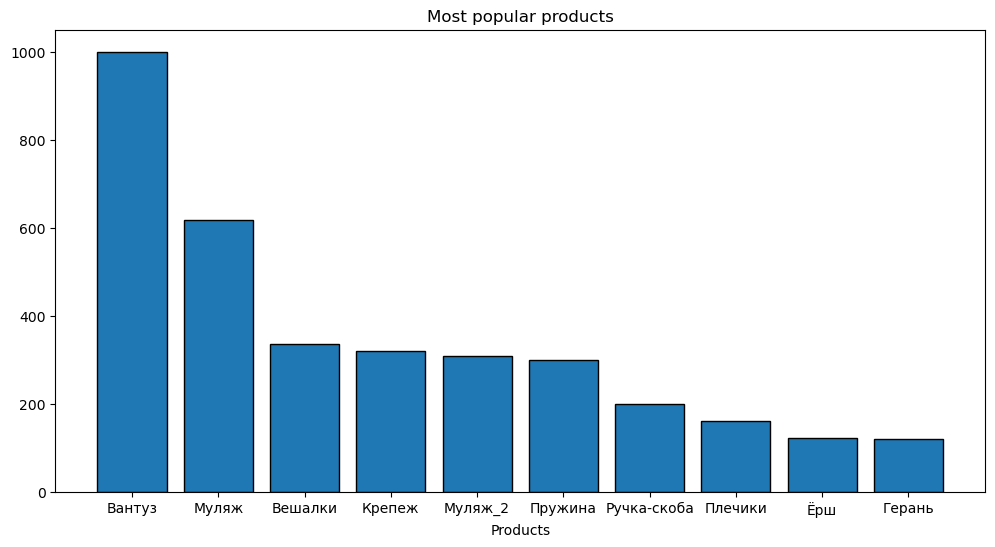

In [37]:
x=data.groupby('only_product_name')['quantity'].sum()
x=x.sort_values(ascending=False)
x=x.head(10)
plt.figure(figsize=(12,6))
plt.bar(names,x.values,edgecolor='black')
plt.title('Most popular products')
plt.xlabel('Products')
plt.show()

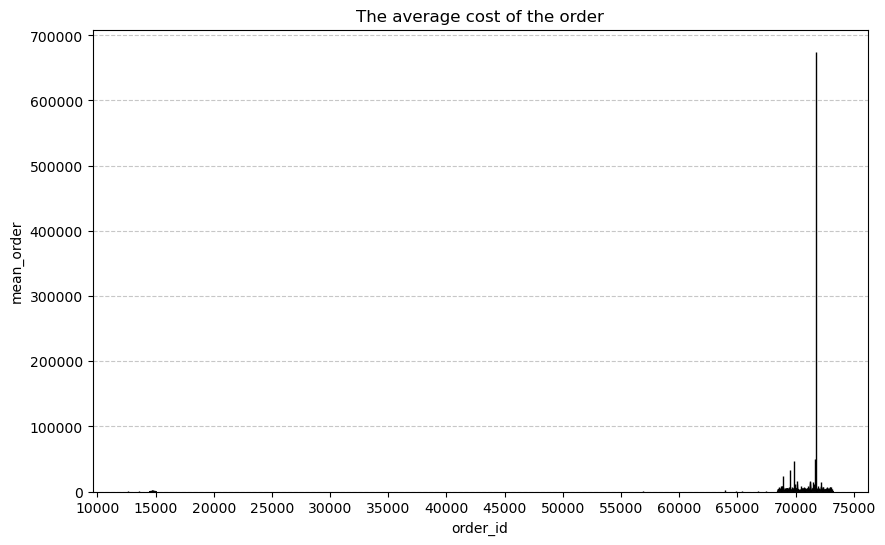

In [39]:
# Создаем колонку с общим доходом
data['mean_order']=data['quantity']*data['price']
x=data.groupby('order_id')['mean_order'].mean()
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(x.index, x.values, color='skyblue', edgecolor='black')
plt.title('The average cost of the order')
plt.xlabel('order_id')
plt.ylabel('mean_order') 
# Устанавливаем значение в оси y
plt.xticks(range(10000,80000,5000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [298]:
x

order_id
12624     187.500000
13547     228.000000
14480     119.666667
14481     150.000000
14482     188.000000
            ...     
73073    3200.000000
73077    6899.000000
73082    3779.000000
73095     952.000000
73110    4400.000000
Name: mean_order, Length: 849, dtype: float64

# Task 4

**Статистические характеристики**
`Цель`: Рассчитать основные статистические характеристики данных.

Рассчитать `среднее`, `медиану`, `стандартное отклонение` для количества товаров и цен.

Выявить наиболее часто встречающиеся значения (`мода`).

Построить `боксплоты` для визуализации распределения данных.

In [47]:
data[['quantity','price']].agg(['mean','median','std'])

,quantity,price
mean,2.501559,462.028499
median,1.000000,135.000000
std,15.266478,871.296064


In [85]:
data[['quantity','price']].agg(['mode'])

,quantity,price
,mode,mode
0,1,120.0


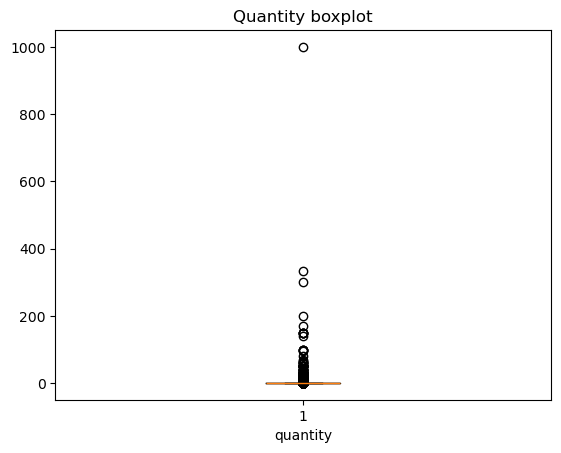

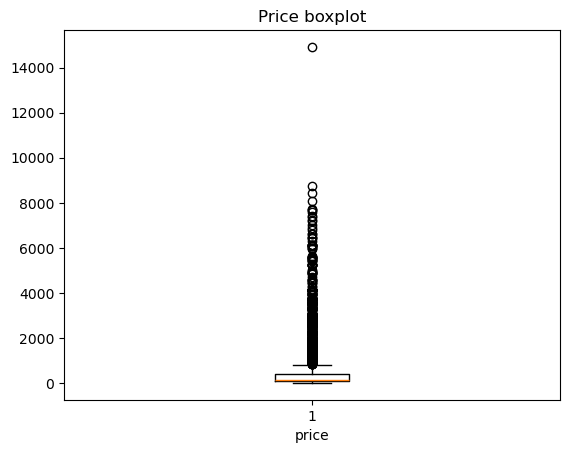

In [57]:
# Quantity boxplot
x=data['quantity']
plt.title('Quantity boxplot')
plt.boxplot(x)
plt.xlabel('quantity')
plt.show()

# Price boxplot
y=data['price']
plt.boxplot(y)
plt.title('Price boxplot')
plt.xlabel('price')
plt.show()

# Task 5

`Цель`: Выявить аномальные значения в данных.

Использовать межквартильный размах (`IQR`) для определения выбросов.

Построить `боксплоты` для визуализации `выбросов`.

Проанализировать выбросы и принять решение о необходимости их `удаления`.


In [18]:
# IQR by quantity
np.percentile(data['quantity'],75)-np.percentile(data['quantity'],25)

0.0

In [20]:
# IQR by price
np.percentile(data['price'],75)-np.percentile(data['price'],25)

297.0

In [55]:
# Уникальные значение в колонке прайс по убыванию
data['price'].value_counts()

price
120.0     1046
38.0       291
90.0       264
135.0      240
188.0      223
          ... 
178.0        1
1275.0       1
3374.0       1
5474.0       1
3779.0       1
Name: count, Length: 360, dtype: int64

In [36]:
# Пределы
data_q=data[data['quantity']<=400]
data_p=data[data['price']<=400]

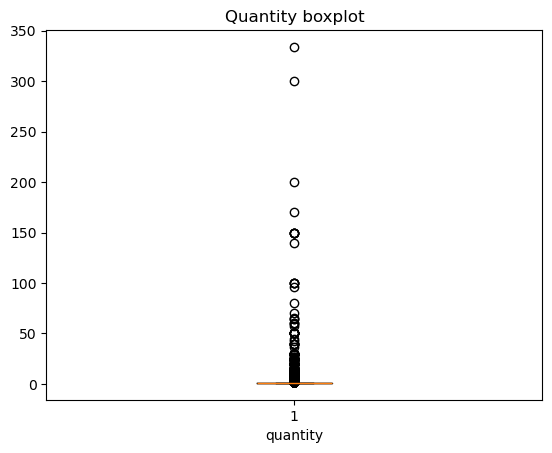

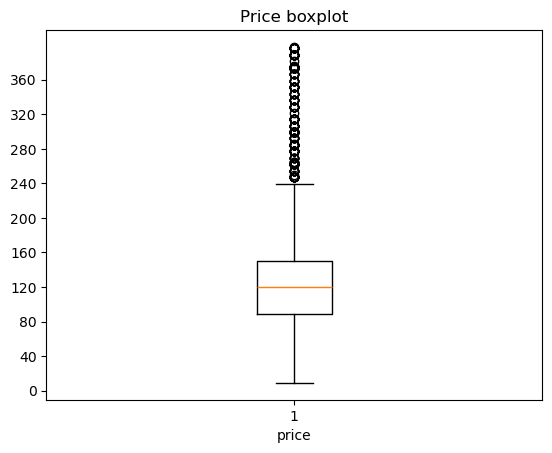

In [44]:
# Quantity boxplot
x=data_q['quantity']
plt.boxplot(x)
plt.title('Quantity boxplot')
plt.xlabel('quantity')
plt.show()

# Price boxplot
y=data_p['price']
plt.boxplot(y)
plt.title('Price boxplot')
plt.xlabel('price')
plt.yticks(range(0,400,40))
plt.show()

# Task 6

`Цель`: Найти и объяснить аномальные значения в датах заказов.

Построить временной ряд заказов.

Выявить даты с необычно `высоким` или `низким` количеством заказов.

Попытаться объяснить причины `аномалий` (например, сезонные распродажи, праздники).

In [29]:
# Группируем по датам 
group=data.groupby(['year','only_date']).agg({'order_id':'count','quantity':'sum'})
group.sort_values(by='order_id',ascending=False)

order_id  quantity
year only_date                     
2019 2019-05-13       146       173
     2019-06-04       141       188
     2019-06-07       120       131
     2019-06-02       101       102
     2019-06-05        99       129
...                   ...       ...
     2019-01-04         2         2
     2019-06-23         1        10
     2019-08-10         1         1
2018 2018-12-30         1         2
2019 2019-07-06         1         1

[394 rows x 2 columns]

In [31]:
# Группируем по времени
group=data.groupby('time').agg({'order_id':'count','quantity':'sum'})
group.sort_values(by='order_id',ascending=False)

,order_id,quantity
time,,
13:00:00,569,1257
09:00:00,517,1183
10:00:00,487,1225
11:00:00,475,1360
14:00:00,457,1400
16:00:00,455,970
08:00:00,416,1210
17:00:00,396,819
12:00:00,394,769


In [145]:
# Top by years
group=data.groupby(['year','only_date']).agg({'order_id':'count','quantity':'sum'})
group.loc[group.groupby('year')['order_id'].idxmax()]

,,order_id,quantity
year,only_date,,
2018,2018-10-02,43,86
2019,2019-05-13,146,173


# Task 7

`Цель`: Разделить товары на категории для дальнейшего анализа.

Определить `основные` категории товаров на основе наименований.

Добавить `новую колонку` с категориями товаров.

Проанализировать распределение заказов по категориям.

In [13]:
# Функция которая разделяет на категории
def give_category(product):
    if 'растение' in product.lower() or  'рассада' in product.lower() \
    or 'герань' in product.lower() or 'радермахера' in product.lower()\
    or 'циперус ' in product.lower() or 'хризолидокарпус ' in product.lower()\
    or 'Пеларгония' in product.lower():
        return 'растение'
    elif 'сушилка' in product.lower() or 'таз' in product.lower()\
    or 'щетка' in product.lower() or 'штора' in product.lower():
        return 'бытовые товары'
    elif 'нож' in product.lower() or 'банка' in product.lower()\
    or 'бидон' in product.lower() or 'кружка' in product.lower()\
    or 'cалатник' in product.lower():
        return 'посуда'
    elif 'муляж' in product.lower() or 'искусственный' in product.lower():
        return 'декор'
    elif 'дыня' in product.lower():
        return 'фрукты'
    elif 'томата' in product.lower():
        return 'овощи'
    elif 'сумка' in product.lower():
        return 'сумки для покупок'
    elif 'коврик' in product.lower():
        return 'коврики'
    else:
        return 'другое'

In [15]:
# Создание колонки category
data['category']=data['only_product_name'].apply(give_category)

In [17]:
# Group by category
x=data.groupby('category')['only_product_name'].count()
x.reset_index()

,category,only_product_name
0,бытовые товары,548
1,декор,302
2,другое,3223
3,коврики,121
4,овощи,162
5,посуда,92
6,растение,1841
7,сумки для покупок,422
8,фрукты,26


# Task 8

`Цель`: Определить товары основного и дополнительного ассортимента.

Определить критерии для выделения `основного ассортимента` (например, по частоте заказов).
                                                          
Выделить товары `основного ассортимента`.

Проанализировать `долю` основного ассортимента в общих продажах.

In [19]:
# Топ продукты по количеству заказов
x=data.groupby('only_product_name')['quantity'].sum()
x=x.reset_index()
x=x.sort_values(by='quantity',ascending=False)
# Основной ассортимент
main=x['quantity'].head(6)
# Дополнительный ассортимент
add=x.drop([117,801,188,634,804,1162])['quantity'].sum()

In [21]:
# Екі ассортиментті қосу/Добавление двух ассортиментов
main[0]=add

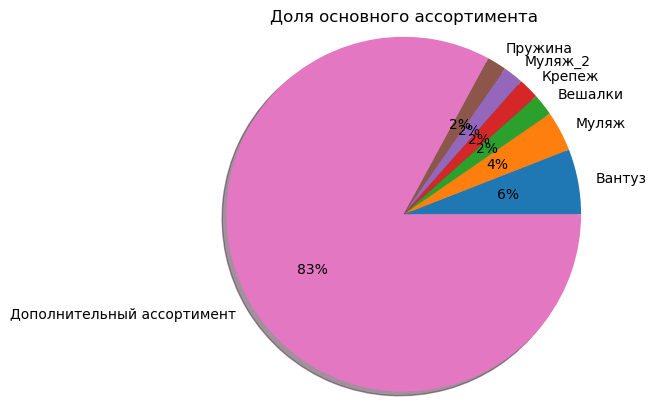

In [23]:
# Диаграмма pie
names=['Вантуз',
       'Муляж',
       'Вешалки',
       'Крепеж',
       'Муляж_2',
       'Пружина',
       'Дополнительный ассортимент']
plt.pie(main, labels=names, shadow=True,radius=1.2,autopct='%1.0f%%')
plt.title('Доля основного ассортимента')
plt.show()

# Task 9

`Цель`: Проверить выдвинутую гипотезу о продажах.

Сформулировать `гипотезу` (например, основная доля продаж приходится на ограниченный ассортимент товаров).

Выбрать подходящий статистический `тест` для проверки гипотезы.

Провести тест и интерпретировать `результаты`.

In [89]:
from scipy.stats import mannwhitneyu

In [23]:
# All sales 
data['total_sales']=data['quantity']*data['price']

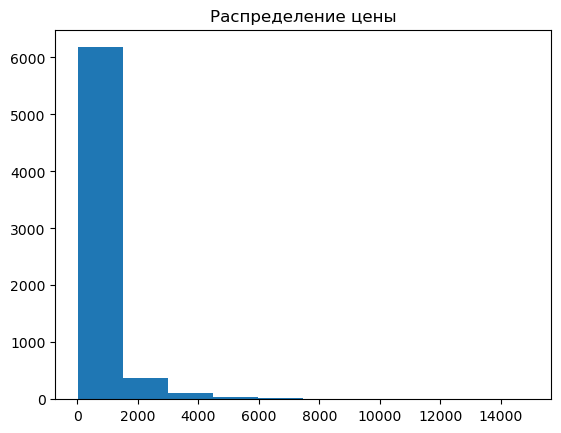

In [157]:
# Проверяем распределение данны, чтобы знать какой тест использвать
plt.hist(data['price'])
plt.title('Распределение цены')
plt.show()

In [95]:
# Суммируем продажи по продуктам
y=data.groupby('only_product_name')['total_sales'].sum()
y=y.reset_index()

In [91]:
# топ 20 индекс по заказам
xx=x.head(20)
xx.index

Index([ 117,  801,  188,  634,  804, 1162, 1416, 1077,    7,  211, 1573,  749,
       2160, 2148,  635, 2149, 2150, 2101, 2162,  652],
      dtype='int64')

In [83]:
# Дополнительный ассортимент
dop_assort=y.drop([ 117,  801,  188,  634,  804, 1162, 1416, 1077,    7,  211, 1573,  749,
       2160, 2148,  635, 2149, 2150, 2101, 2162,  652])
dop_assort=dop_assort['total_sales']

In [77]:
# Основной ассортимент
main_assort=y.loc[[ 117, 801, 188, 634, 804, 1162, 1416, 1077, 7, 211, 1573, 749,
       2160, 2148,  635, 2149, 2150, 2101, 2162,  652]]
main_assort=main_assort['total_sales']

In [105]:
# Test 
statistic,pvalue=mannwhitneyu(main_assort,dop_assort)

In [121]:
# Проверяем
a=0.05
if pvalue<a:
    print('H1 is True. Основная доля продаж приходится на ограниченный ассортимент товаров')
else:
    print('H0 is True. Нет разницы')

H1 is True. Основная доля продаж приходится на ограниченный ассортимент товаров


In [123]:
pvalue

1.4102899635724136e-10

# Conclusion

**Бізге берілген датасетте әртүрлі ақпараттар берілген.**

**Негізгілеріне келсек**:

1. `Продукттардың жазылуы`. Product колонкасында өте көп мағлұмат берілген. Және де егер біз размерлерін немесе түстері турлы мағлұматтарды алып тастасақ дубликаттар көбейіп кетеді. Және де бұл көптеген данныйларды искажать етеді.

2. `Бағасының диапазоны`. Продукттың бағалары 100 бен 14000 шамасында берілген. Және менің ойымша жоғары бағалы продукттарды выброс ретінде алып тастамайтын едім. Өйткені ол заттарды аз да болса заказ бар. Ал негізгі бағалар 100-300 аралығында.

3. `Quantity - заказдағы продукт саны`. Бұл жерде де негізгі заказдағы продукттар саны 1-ге тең. Және де 1000-ға тең заказдағы продукттар да бар. Мен бірақ бұларды датасеттен алып тастамайтын едім. Өйткені бұлардың маңызы бар.

4. `Заказдардың даталары`. Заказдың даталарына келсек, ең көп заказдар 2019.06-2019.05 даталарына келеді. Бұның себебі бұл дүкен бытовой товарлар сатуына байланысты деп ойлаймын. Өйткені жаз уақытында үй шаруалары өте қарқынды.

5. `Категорияға бөлуге` келсек мен продукттерді кілт сөздер арқылы категорияға бөлдім.

6. `Сатылымдарды бөлу`: Негізгі ассортимент (тапсырыстар саны бойынша үздік 20 өнім) қалған өнімдерге қарағанда total_sales көрсеткіші бойынша статистикалық маңызы бар артықшылық көрсетті. Бұл өнімдердің шағын тобы (негізгі ассортимент) барлық сатылымдардың елеулі үлесін қамтамасыз ететінін білдіреді.

7. `Гипотезаны растау`: Манна-Уитни тесті бойынша алынған p-value мәні маңыздылық деңгейінен (0.05) едәуір төмен болды, бұл негізгі және қосымша ассортимент арасындағы сатылымдардағы айырмашылықтың маңызды екенін дәлелдейді. Бұл негізгі ассортимент сатылымдардың басым бөлігін құрайтынын айтуға негіз береді.

**Бизнеске арналған ұсыныстар**

1. `Ассортиментті оңтайландыру`: Қосымша ассортиментті қайта қарау мүмкіндігін қарастырып, сатылымдарға әсер етпейтін тауарларды алып тастау немесе оларды алмастыру, не болмаса маңызды болса, олардың сатылымын арттыруға баса назар аудару қажет.

2. `Жарнамалық және ынталандыру шаралары`: Қосымша ассортимент үшін сұранысты ынталандыру және олардың сатылымдағы үлесін арттыру мақсатында жеңілдіктер, кросс-сатылымдар немесе акцияларды енгізу қажет болуы мүмкін.

**Болашақ зерттеу бағыттары**

1. `Трендтерді талдау`: Негізгі ассортименттің сатылымындағы маусымдық және уақытша ауытқуларды зерттеу. Бұл қорларды көбейту және маркетингтік науқандарды бастау үшін оңтайлы кезеңдерді анықтауға көмектеседі.

2. `Клиенттік артықшылықтарды зерттеу`: Негізгі және қосымша ассортиментті қандай клиенттер санаты артық көретінін түсіну үшін клиенттер сегменттері бойынша талдау жүргізу. Бұл мақсатты аудиторияға бағытталған жарнама жасауға көмектеседі.

3. `Маркетинг тиімділігін талдау`: Негізгі және қосымша ассортименттің сатылымына маркетингтік күш-жігердің (мысалы, жеңілдіктер, акциялар) қалай әсер ететінін бағалау.

In [49]:
data.to_excel('Last_dataset.xlsx')

In [55]:
data['price'].value_counts()

price
120.0     1046
38.0       291
90.0       264
135.0      240
188.0      223
          ... 
178.0        1
1275.0       1
3374.0       1
5474.0       1
3779.0       1
Name: count, Length: 360, dtype: int64